In [ ]:
# Cell 0: Add project root to sys.path so 'src' can be imported
import sys
sys.path.insert(0, '/home/alidmo/Studies/iris-classification')

['/home/alidmo/Studies/iris-classification', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/alidmo/Studies/iris-classification/venv/lib/python3.12/site-packages']


In [8]:
# Cell 1: imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.data_loader import load_iris_data


In [9]:
# Cell 2: load & peek
df = load_iris_data()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Cell 3: pairwise relationships
sns.pairplot(df, hue='target', vars=df.columns[:-1])
plt.show()


In [11]:
# Cell 4: train on full X,y to inspect performance
from src.model import train_model, predict
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('target', axis=1)
y = df['target']
model = train_model(X, y, test_size=None)  # fit on all data

# predictions & report
preds = predict(model, X)
print(classification_report(y, preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



/home/alidmo/Studies/iris-classification/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


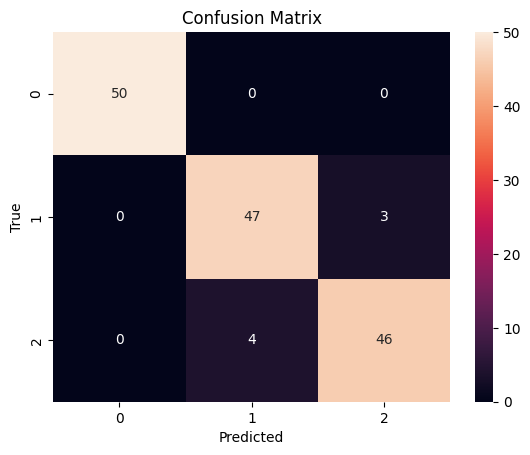

In [12]:
# Cell 5: confusion matrix
cm = confusion_matrix(y, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("5-fold CV accuracy:", scores.mean())


5-fold CV accuracy: 0.9600000000000002


/home/alidmo/Studies/iris-classification/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alidmo/Studies/iris-classification/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alidmo/Studies/iris-classification/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alidmo/Studies/iris-classification